In [89]:
import os
import json
import requests
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [90]:
load_dotenv()

True

In [91]:
csvpath = Path('pandemic_stock_picks.csv')
ticker_data = pd.read_csv(csvpath, infer_datetime_format=True, parse_dates=True, nrows = 24)
ticker_data.sort_index()
ticker_data

,Unnamed: 0,AAPL,AAPL.1,AAPL.2,AAPL.3,AAPL.4,AMD,AMD.1,AMD.2,AMD.3,...,WING,WING.1,WING.2,WING.3,WING.4,ZM,ZM.1,ZM.2,ZM.3,ZM.4
0,NaN,open,high,low,close,volume,open,high,low,close,...,open,high,low,close,volume,open,high,low,close,volume
1,time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-06 00:00:00-05:00,282.0,290.82,281.23,288.98,51462221,49.46,49.54,46.74,48.6,...,77.15,80.91,76.44,79.28,1080468,119.65,122.0,107.0,114.33,45566924
3,2020-03-09 00:00:00-04:00,263.75,278.09,263.0,266.09,130952816,43.35,46.34,43.03,43.26,...,75.02,76.635,74.0601,74.76,708463,102.86,116.5,100.88,113.75,12690592
4,2020-03-10 00:00:00-04:00,277.14,286.44,269.37,285.69,65679929,45.41,45.44,43.1,45.38,...,77.3,78.7,72.635,76.17,422679,113.8,113.8,105.0,108.4858,10004808
5,2020-03-11 00:00:00-04:00,277.39,281.22,271.86,275.3,58216000,44.19,45.97,43.8,45.69,...,74.16,74.19,70.0,71.57,659010,108.41,113.99,107.0,110.26,12464414
6,2020-03-12 00:00:00-04:00,255.94,270.0,248.0,248.0,96606887,42.0,42.5,39.0,39.005,...,66.72,69.5,63.92,68.26,1010453,106.0,113.8712,104.39,109.47,11884503
7,2020-03-13 00:00:00-04:00,264.89,279.92,252.95,278.06,83319113,42.2,43.91,39.6,43.9,...,71.7,72.87,63.69,68.05,828572,113.0,113.8,104.16,107.5,8930120
8,2020-03-16 00:00:00-04:00,241.95,259.08,240.0,241.47,74222204,39.16,43.37,38.51,38.71,...,61.81,61.98,55.44,57.52,2308884,105.0,119.87,103.2,107.98,33957880
9,2020-03-17 00:00:00-04:00,247.51,257.61,238.4,252.85,151273870,40.19,42.88,38.3,41.88,...,58.16,65.185,53.55,63.12,1556427,107.33,113.83,102.0,111.04,18418386


In [92]:
month_close_data = ticker_data[['AAPL.3','FB.3','AMZN.3','NFLX.3','GOOG.3','SHOP.3','NVDA.3', 'AMD.3','PEP.3','MKC.3', 'DPZ.3','WING.3','ATVI.3','COST.3','CPB.3','ETSY.3','OKTA.3','PLD.3','TTWO.3','ZM.3']].dropna().drop([0])
month_close_data

,AAPL.3,FB.3,AMZN.3,NFLX.3,GOOG.3,SHOP.3,NVDA.3,AMD.3,PEP.3,MKC.3,DPZ.3,WING.3,ATVI.3,COST.3,CPB.3,ETSY.3,OKTA.3,PLD.3,TTWO.3,ZM.3
2,288.98,181.11,1901.14,368.9,1298.41,472.0877,266.07,48.6,137.27,150.54,336.47,79.28,59.96,311.34,51.75,60.61,125.99,85.83,117.71,114.33
3,266.09,168.6,1800.01,346.03,1214.51,417.61,245.01,43.26,130.15,143.87,336.26,74.76,57.165,300.945,50.19,58.5,114.86,77.76,113.83,113.75
4,285.69,178.19,1894.0,364.27,1281.01,450.17,261.08,45.38,134.23,151.49,344.05,76.17,60.72,309.67,51.25,57.97,119.21,80.86,118.75,108.4858
5,275.3,170.22,1819.63,349.59,1215.1,422.23,246.16,45.69,129.66,146.61,332.66,71.57,59.33,297.27,50.475,50.21,114.77,73.72,118.9,110.26
6,248.0,154.46,1676.21,312.63,1113.84,377.52,216.035,39.005,115.34,131.17,315.61,68.26,54.56,279.635,47.66,44.04,106.08,70.17,108.35,109.47
7,278.06,170.62,1786.31,336.3,1219.76,390.82,240.83,43.9,127.45,135.0,316.63,68.05,59.04,302.69,49.27,49.01,107.02,77.81,116.62,107.5
8,241.47,145.96,1688.0,296.84,1085.0,322.29,196.59,38.71,113.07,120.37,285.75,57.52,52.76,283.18,49.3,41.65,96.11,64.37,108.0,107.98
9,252.85,149.42,1807.38,319.7401,1119.79,354.98,217.26,41.88,127.72,138.69,298.67,63.12,56.16,307.0,53.84,42.115,109.18,70.7,116.46,111.04
10,249.0,147.05,1832.39,317.33,1098.64,336.57,203.51,39.13,126.6,141.06,291.53,49.71,55.75,307.55,50.49,39.25,102.06,67.84,106.62,118.8002
11,244.78,153.03,1880.5,331.885,1115.06,332.4901,212.97,39.79,117.34,125.65,323.15,57.29,54.1163,305.22,47.5,34.66,113.96,64.06,106.33,123.38


In [93]:
month_close_data.apply(pd.to_numeric, axis=0)

,AAPL.3,FB.3,AMZN.3,NFLX.3,GOOG.3,SHOP.3,NVDA.3,AMD.3,PEP.3,MKC.3,DPZ.3,WING.3,ATVI.3,COST.3,CPB.3,ETSY.3,OKTA.3,PLD.3,TTWO.3,ZM.3
2,288.980,181.11,1901.140,368.9000,1298.41,472.0877,266.070,48.600,137.27,150.5400,336.47,79.280,59.9600,311.340,51.750,60.610,125.99,85.83,117.71,114.3300
3,266.090,168.60,1800.010,346.0300,1214.51,417.6100,245.010,43.260,130.15,143.8700,336.26,74.760,57.1650,300.945,50.190,58.500,114.86,77.76,113.83,113.7500
4,285.690,178.19,1894.000,364.2700,1281.01,450.1700,261.080,45.380,134.23,151.4900,344.05,76.170,60.7200,309.670,51.250,57.970,119.21,80.86,118.75,108.4858
5,275.300,170.22,1819.630,349.5900,1215.10,422.2300,246.160,45.690,129.66,146.6100,332.66,71.570,59.3300,297.270,50.475,50.210,114.77,73.72,118.90,110.2600
6,248.000,154.46,1676.210,312.6300,1113.84,377.5200,216.035,39.005,115.34,131.1700,315.61,68.260,54.5600,279.635,47.660,44.040,106.08,70.17,108.35,109.4700
7,278.060,170.62,1786.310,336.3000,1219.76,390.8200,240.830,43.900,127.45,135.0000,316.63,68.050,59.0400,302.690,49.270,49.010,107.02,77.81,116.62,107.5000
8,241.470,145.96,1688.000,296.8400,1085.00,322.2900,196.590,38.710,113.07,120.3700,285.75,57.520,52.7600,283.180,49.300,41.650,96.11,64.37,108.00,107.9800
9,252.850,149.42,1807.380,319.7401,1119.79,354.9800,217.260,41.880,127.72,138.6900,298.67,63.120,56.1600,307.000,53.840,42.115,109.18,70.70,116.46,111.0400
10,249.000,147.05,1832.390,317.3300,1098.64,336.5700,203.510,39.130,126.60,141.0600,291.53,49.710,55.7500,307.550,50.490,39.250,102.06,67.84,106.62,118.8002
11,244.780,153.03,1880.500,331.8850,1115.06,332.4901,212.970,39.790,117.34,125.6500,323.15,57.290,54.1163,305.220,47.500,34.660,113.96,64.06,106.33,123.3800


In [128]:
stock_list = month_close_data.astype(str).astype(float)
stock_list

,AAPL.3,FB.3,AMZN.3,NFLX.3,GOOG.3,SHOP.3,NVDA.3,AMD.3,PEP.3,MKC.3,DPZ.3,WING.3,ATVI.3,COST.3,CPB.3,ETSY.3,OKTA.3,PLD.3,TTWO.3,ZM.3
2,288.980,181.11,1901.140,368.9000,1298.41,472.0877,266.070,48.600,137.27,150.5400,336.47,79.280,59.9600,311.340,51.750,60.610,125.99,85.83,117.71,114.3300
3,266.090,168.60,1800.010,346.0300,1214.51,417.6100,245.010,43.260,130.15,143.8700,336.26,74.760,57.1650,300.945,50.190,58.500,114.86,77.76,113.83,113.7500
4,285.690,178.19,1894.000,364.2700,1281.01,450.1700,261.080,45.380,134.23,151.4900,344.05,76.170,60.7200,309.670,51.250,57.970,119.21,80.86,118.75,108.4858
5,275.300,170.22,1819.630,349.5900,1215.10,422.2300,246.160,45.690,129.66,146.6100,332.66,71.570,59.3300,297.270,50.475,50.210,114.77,73.72,118.90,110.2600
6,248.000,154.46,1676.210,312.6300,1113.84,377.5200,216.035,39.005,115.34,131.1700,315.61,68.260,54.5600,279.635,47.660,44.040,106.08,70.17,108.35,109.4700
7,278.060,170.62,1786.310,336.3000,1219.76,390.8200,240.830,43.900,127.45,135.0000,316.63,68.050,59.0400,302.690,49.270,49.010,107.02,77.81,116.62,107.5000
8,241.470,145.96,1688.000,296.8400,1085.00,322.2900,196.590,38.710,113.07,120.3700,285.75,57.520,52.7600,283.180,49.300,41.650,96.11,64.37,108.00,107.9800
9,252.850,149.42,1807.380,319.7401,1119.79,354.9800,217.260,41.880,127.72,138.6900,298.67,63.120,56.1600,307.000,53.840,42.115,109.18,70.70,116.46,111.0400
10,249.000,147.05,1832.390,317.3300,1098.64,336.5700,203.510,39.130,126.60,141.0600,291.53,49.710,55.7500,307.550,50.490,39.250,102.06,67.84,106.62,118.8002
11,244.780,153.03,1880.500,331.8850,1115.06,332.4901,212.970,39.790,117.34,125.6500,323.15,57.290,54.1163,305.220,47.500,34.660,113.96,64.06,106.33,123.3800


In [129]:
daily_returns = stock_list.pct_change()
daily_returns

,AAPL.3,FB.3,AMZN.3,NFLX.3,GOOG.3,SHOP.3,NVDA.3,AMD.3,PEP.3,MKC.3,DPZ.3,WING.3,ATVI.3,COST.3,CPB.3,ETSY.3,OKTA.3,PLD.3,TTWO.3,ZM.3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.079210,-0.069074,-0.053194,-0.061995,-0.064617,-0.115397,-0.079152,-0.109877,-0.051869,-0.044307,-0.000624,-0.057013,-0.046614,-0.033388,-0.030145,-0.034813,-0.088340,-0.094023,-0.032962,-0.005073
4,0.073659,0.056880,0.052216,0.052712,0.054755,0.077967,0.065589,0.049006,0.031348,0.052964,0.023167,0.018860,0.062188,0.028992,0.021120,-0.009060,0.037872,0.039866,0.043222,-0.046279
5,-0.036368,-0.044728,-0.039266,-0.040300,-0.051452,-0.062065,-0.057147,0.006831,-0.034046,-0.032213,-0.033106,-0.060391,-0.022892,-0.040043,-0.015122,-0.133862,-0.037245,-0.088301,0.001263,0.016354
6,-0.099165,-0.092586,-0.078818,-0.105724,-0.083335,-0.105890,-0.122380,-0.146312,-0.110443,-0.105313,-0.051254,-0.046248,-0.080398,-0.059323,-0.055770,-0.122884,-0.075717,-0.048155,-0.088730,-0.007165
7,0.121210,0.104623,0.065684,0.075713,0.095094,0.035230,0.114773,0.125497,0.104994,0.029199,0.003232,-0.003076,0.082111,0.082447,0.033781,0.112852,0.008861,0.108878,0.076327,-0.017996
8,-0.131590,-0.144532,-0.055035,-0.117336,-0.110481,-0.175349,-0.183698,-0.118223,-0.112829,-0.108370,-0.097527,-0.154739,-0.106369,-0.064455,0.000609,-0.150173,-0.101944,-0.172728,-0.073915,0.004465
9,0.047128,0.023705,0.070723,0.077146,0.032065,0.101430,0.105143,0.081891,0.129566,0.152197,0.045214,0.097357,0.064443,0.084116,0.092089,0.011164,0.135990,0.098338,0.078333,0.028339
10,-0.015226,-0.015861,0.013838,-0.007538,-0.018887,-0.051862,-0.063288,-0.065664,-0.008769,0.017088,-0.023906,-0.212452,-0.007301,0.001792,-0.062221,-0.068028,-0.065213,-0.040453,-0.084493,0.069887
11,-0.016948,0.040666,0.026255,0.045867,0.014946,-0.012122,0.046484,0.016867,-0.073144,-0.109244,0.108462,0.152484,-0.029304,-0.007576,-0.059220,-0.116943,0.116598,-0.055719,-0.002720,0.038550


<AxesSubplot:>

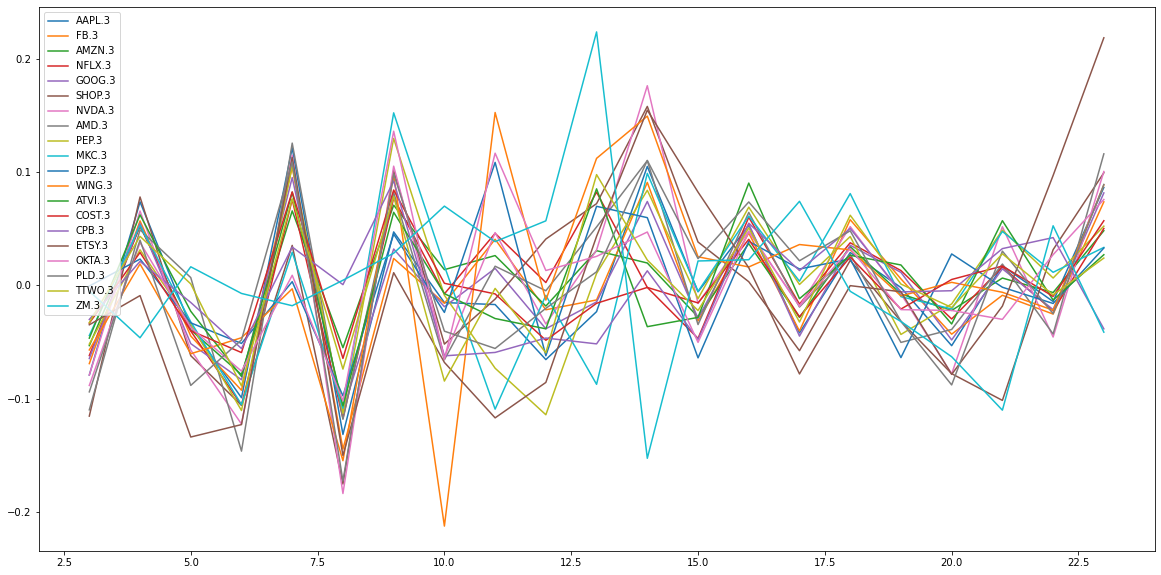

In [161]:
stock_list.pct_change().plot(figsize= (20,10))

In [145]:
cum_returns = (1+daily_returns).cumprod()-1
cum_returns

,AAPL.3,FB.3,AMZN.3,NFLX.3,GOOG.3,SHOP.3,NVDA.3,AMD.3,PEP.3,MKC.3,DPZ.3,WING.3,ATVI.3,COST.3,CPB.3,ETSY.3,OKTA.3,PLD.3,TTWO.3,ZM.3
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.079210,-0.069074,-0.053194,-0.061995,-0.064617,-0.115397,-0.079152,-0.109877,-0.051869,-0.044307,-0.000624,-0.057013,-0.046614,-0.033388,-0.030145,-0.034813,-0.088340,-0.094023,-0.032962,-0.005073
4,-0.011385,-0.016123,-0.003756,-0.012551,-0.013401,-0.046427,-0.018754,-0.066255,-0.022146,0.006311,0.022528,-0.039228,0.012675,-0.005364,-0.009662,-0.043557,-0.053814,-0.057905,0.008835,-0.051117
5,-0.047339,-0.060129,-0.042874,-0.052345,-0.064163,-0.105611,-0.074830,-0.059877,-0.055438,-0.026106,-0.011323,-0.097250,-0.010507,-0.045192,-0.024638,-0.171589,-0.089055,-0.141093,0.010110,-0.035599
6,-0.141809,-0.147148,-0.118313,-0.152535,-0.142151,-0.200318,-0.188052,-0.197428,-0.159758,-0.128670,-0.061997,-0.139001,-0.090060,-0.101834,-0.079034,-0.273387,-0.158028,-0.182454,-0.079517,-0.042509
7,-0.037788,-0.057921,-0.060401,-0.088371,-0.060574,-0.172145,-0.094862,-0.096708,-0.071538,-0.103228,-0.058965,-0.141650,-0.015344,-0.027783,-0.047923,-0.191388,-0.150568,-0.093441,-0.009260,-0.059739
8,-0.164406,-0.194081,-0.112112,-0.195337,-0.164363,-0.317309,-0.261134,-0.203498,-0.176295,-0.200412,-0.150742,-0.274470,-0.120080,-0.090448,-0.047343,-0.312820,-0.237162,-0.250029,-0.082491,-0.055541
9,-0.125026,-0.174977,-0.049318,-0.133261,-0.137568,-0.248063,-0.183448,-0.138272,-0.069571,-0.078717,-0.112343,-0.203835,-0.063376,-0.013940,0.040386,-0.305148,-0.133423,-0.176279,-0.010619,-0.028776
10,-0.138349,-0.188063,-0.036163,-0.139794,-0.153857,-0.287060,-0.235126,-0.194856,-0.077730,-0.062973,-0.133563,-0.372982,-0.070213,-0.012173,-0.024348,-0.352417,-0.189936,-0.209600,-0.094215,0.039099
11,-0.152952,-0.155044,-0.010857,-0.100339,-0.141211,-0.295703,-0.199572,-0.181276,-0.145188,-0.165338,-0.039587,-0.277371,-0.097460,-0.019657,-0.082126,-0.428147,-0.095484,-0.253641,-0.096678,0.079157


<AxesSubplot:>

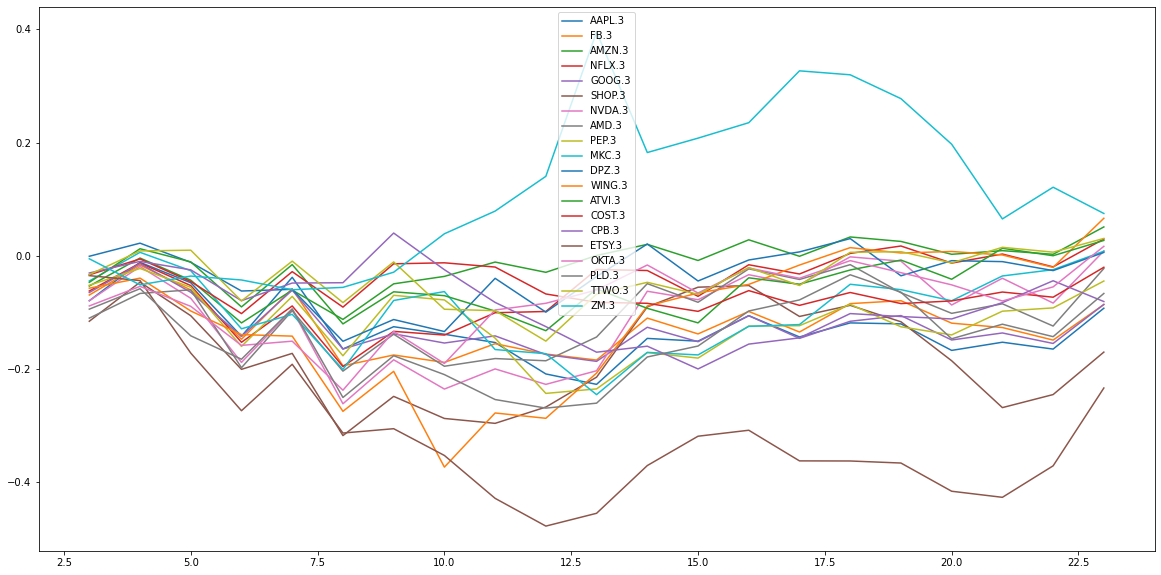

In [162]:
cum_returns.plot(figsize=(20,10))

In [142]:
standard_deviation = cum_returns.std()
standard_deviation

AAPL.3    0.052699
FB.3      0.049454
AMZN.3    0.044476
NFLX.3    0.061645
GOOG.3    0.043692
SHOP.3    0.087819
NVDA.3    0.085263
AMD.3     0.061826
PEP.3     0.060639
MKC.3     0.071015
DPZ.3     0.051368
WING.3    0.120914
ATVI.3    0.047172
COST.3    0.031308
CPB.3     0.060751
ETSY.3    0.120870
OKTA.3    0.063290
PLD.3     0.072358
TTWO.3    0.047693
ZM.3      0.142844
dtype: float64

<AxesSubplot:>

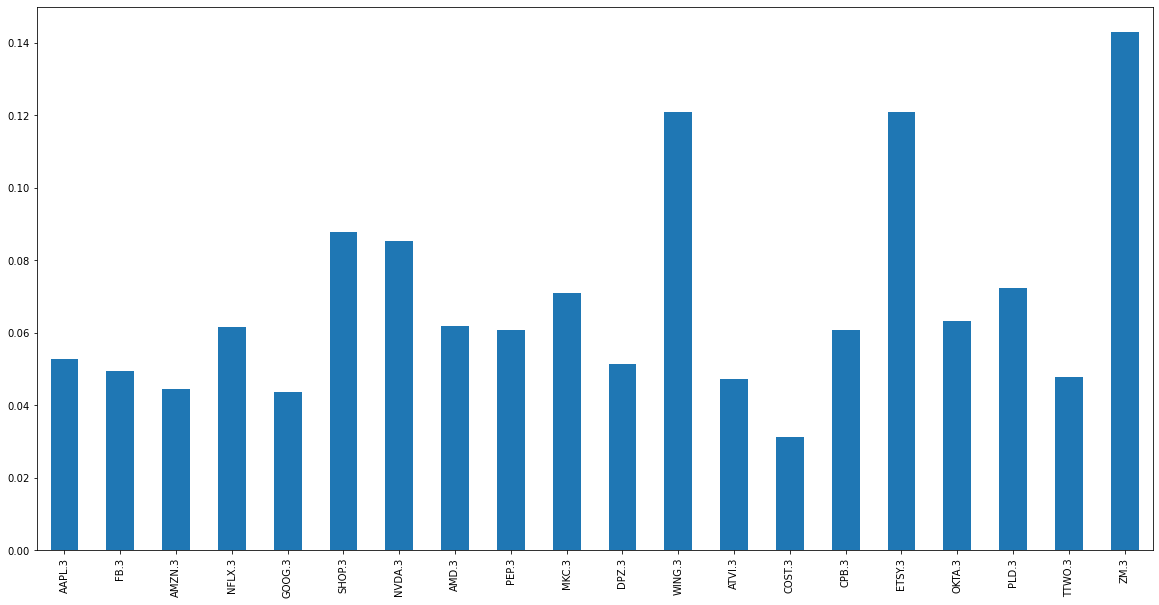

In [152]:
standard_deviation.plot(kind='bar', figsize=(20,10))